In [1]:
import pandas as pd
import numpy as np

In [2]:
metadata_df = pd.read_csv('metadata.csv')

In [3]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9503 entries, 0 to 9502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6571 non-null   float64
 1   ARTIST        9270 non-null   object 
 2   TITLE         8177 non-null   object 
 3   METADATA_URL  9503 non-null   object 
 4   IMAGE_LINK    9503 non-null   object 
 5   IMAGE_NAME    9503 non-null   object 
 6   DESCRIPTION   7509 non-null   object 
 7   TIMEFRAME     8867 non-null   object 
 8   TECHNIQUE     9241 non-null   object 
dtypes: float64(1), object(8)
memory usage: 668.3+ KB


In [52]:
values = metadata_df.TIMEFRAME_ABS.value_counts().values[0:14]
keys = list(metadata_df.TIMEFRAME_ABS.value_counts().keys()[0:14])

In [53]:
keys

['1451',
 '1501',
 '1601',
 '1401',
 '1551',
 '1301',
 '1351',
 '1651',
 '1500',
 '1480',
 '1701',
 '1410',
 '1430',
 '1460']

In [54]:
for i in range(len(keys)):
    keys[i] = keys[i] + "-" + str(int(keys[i])+50)

In [55]:
import plotly.express as px

In [56]:
px.histogram(x = keys, y = values, color = keys)

In [22]:
metadata_df.TIMEFRAME.iloc[7000].split(" ")[-1]

['a', '1430/34']

In [32]:
def retrieve_timeline(row):
    try:
        return row.split(" ")[-1][:4]
    except:
        pass
    

In [33]:
metadata_df['TIMEFRAME_ABS'] = metadata_df.TIMEFRAME.apply(retrieve_timeline)

In [35]:
metadata_df['TIMEFRAME_ABS'].value_counts().sum()

8867

In [57]:
metadata_df.TECHNIQUE

0                            Oil on wood, 55,5 x 76 cm cm
1                              Oil on panel, 126 x 200 cm
2                                             Oil on wood
3                                             Oil on wood
4                                             Oil on wood
                              ...                        
9498                                            engraving
9499                              woodcut [restrike 1968]
9500                                  miniature on vellum
9501    pen and brown-black ink over black chalk on la...
9502                                              woodcut
Name: TECHNIQUE, Length: 9503, dtype: object

In [67]:
metadata_df['TECHNIQUE'] = metadata_df['TECHNIQUE'].fillna("Unknown")

In [68]:
keys = metadata_df['TECHNIQUE'].value_counts().keys()
values = metadata_df['TECHNIQUE'].value_counts().values

In [69]:
values

array([1120,  694,  425, ...,    1,    1,    1])

In [79]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=keys[0:15],
                             values=values[0:15], pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [81]:
metadata_df['DESCRIPTION'] = metadata_df['DESCRIPTION'].fillna("")

In [91]:
metadata_df['TITLE'] = metadata_df['TITLE'].fillna("")

In [92]:
metadata_df['TITLE_LEN'] = metadata_df['TITLE'].apply(len)

In [94]:
metadata_df['TITLE_LEN'].value_counts()

0      1326
24      266
26      248
25      243
16      240
       ... 
148       1
194       1
164       1
182       1
147       1
Name: TITLE_LEN, Length: 157, dtype: int64

In [82]:
metadata_df['DESCRIPTION_LEN'] = metadata_df['DESCRIPTION'].apply(len)

<AxesSubplot:>

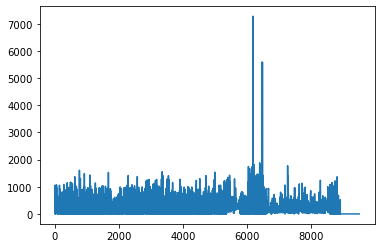

In [85]:
metadata_df['DESCRIPTION_LEN'].plot()

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

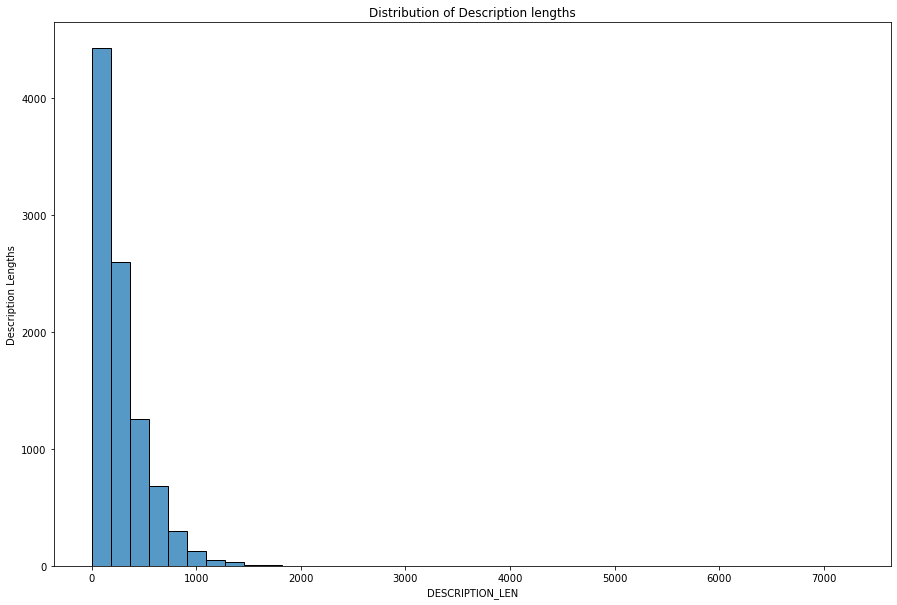

In [98]:
plt.figure(figsize=(15,10))
target_dist = sns.histplot(
    data=metadata_df, 
    x="DESCRIPTION_LEN",
    bins=40,
    palette='rainbow'
)
target_dist.set_title('Distribution of Description lengths')
target_dist.set_ylabel('Description Lengths')
plt.show()

In [95]:
keys = metadata_df['ARTIST'].value_counts().keys()
values = metadata_df['ARTIST'].value_counts().values

In [96]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=keys[0:15],
                             values=values[0:15], pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [4]:
metadata_df

,Unnamed: 0,ARTIST,TITLE,METADATA_URL,IMAGE_LINK,IMAGE_NAME,DESCRIPTION,TIMEFRAME,TECHNIQUE
0,0.0,"AERTSEN, Pieter",Apostles Peter and John,https://www.wga.hu/html/a/aertsen/apostles.html,https://www.wga.hu/detail/a/aertsen/apostles.jpg,web_gallery_aaertsenapostles.jpg,Earlier the painting was attributed to Joachim...,1501-1550,"Oil on wood, 55,5 x 76 cm cm"
1,1.0,"AERTSEN, Pieter",Christ in the House of Martha and Mary,https://www.wga.hu/html/a/aertsen/christ_m.html,https://www.wga.hu/detail/a/aertsen/christ_m.jpg,web_gallery_aaertsenchrist_m.jpg,A kitchen scene combined with a religious subj...,1501-1550,"Oil on panel, 126 x 200 cm"
2,2.0,"AGABITI, Pietro Paolo",Virgin Enthroned between Sts John the Baptist ...,https://www.wga.hu/html/a/agabiti/altar1.html,https://www.wga.hu/detail/a/agabiti/altar1.jpg,web_gallery_aagabitialtar1.jpg,This is the central piece of an altarpiece. Th...,1501-1550,Oil on wood
3,3.0,"AGABITI, Pietro Paolo",Sts Sebastian and Roch,https://www.wga.hu/html/a/agabiti/altar32.html,https://www.wga.hu/detail/a/agabiti/altar32.jpg,web_gallery_aagabitialtar32.jpg,This is one of the four predella scenes belong...,1501-1550,Oil on wood
4,4.0,"AGABITI, Pietro Paolo",St Jerome in the Desert,https://www.wga.hu/html/a/agabiti/altar33.html,https://www.wga.hu/detail/a/agabiti/altar33.jpg,web_gallery_aagabitialtar33.jpg,This is one of the four predella scenes belong...,1501-1550,Oil on wood
...,...,...,...,...,...,...,...,...,...
9498,NaN,Rosenwald Collection,Coats of Arms with Corner Portraits of Henry V...,https://www.nga.gov/collection/art-object-page...,https://media.nga.gov/iiif/b1c8f026-c6c1-45b6-...,nga_b1c8f026-c6c1-45b6-97bc-877c3bda7e50.jpg,NaN,1500.0,engraving
9499,NaN,Rosenwald Collection,The Flight to Egypt,https://www.nga.gov/collection/art-object-page...,https://media.nga.gov/iiif/3149723d-f276-4c0b-...,nga_3149723d-f276-4c0b-9177-5ee29114dfa0.jpg,NaN,1500.0,woodcut [restrike 1968]
9500,NaN,Rosenwald Collection,Saints Peter and Paul,https://www.nga.gov/collection/art-object-page...,https://media.nga.gov/iiif/4106c711-defc-4a1a-...,nga_4106c711-defc-4a1a-8648-668113de7138.jpg,NaN,1489.0,miniature on vellum
9501,NaN,Rosenwald Collection,King John [right side],https://www.nga.gov/collection/art-object-page...,https://media.nga.gov/iiif/8f7afd37-1314-49ef-...,nga_8f7afd37-1314-49ef-b7e5-9689a77c01e4.jpg,NaN,1500.0,pen and brown-black ink over black chalk on la...


In [4]:
def search_st_seb(key, title):
    return True if key in title.lower().split(" ") else False

In [5]:
metadata_df['TITLE'] = metadata_df['TITLE'].fillna("")

In [6]:
metadata_df['sebastian_present'] = metadata_df['TITLE'].apply(lambda x : search_st_seb("sebastian", x))

In [7]:
metadata_df['catherine_present'] = metadata_df['TITLE'].apply(lambda x : search_st_seb("catherine", x))

In [8]:
metadata_df['baptist_present'] = metadata_df['TITLE'].apply(lambda x : search_st_seb("baptist", x))

In [9]:
metadata_df['jerome_present'] = metadata_df['TITLE'].apply(lambda x : search_st_seb("jerome", x))

In [10]:
metadata_df['francis_present'] = metadata_df['TITLE'].apply(lambda x : search_st_seb("francis", x))

In [11]:
metadata_df['magdalene_present'] = metadata_df['TITLE'].apply(lambda x : search_st_seb("magdalene", x))

In [12]:
metadata_df['mark_present'] = metadata_df['TITLE'].apply(lambda x : search_st_seb("mark", x))

In [13]:
metadata_df['lucy_present'] = metadata_df['TITLE'].apply(lambda x : search_st_seb("lucy", x))

In [14]:
metadata_df['evangelist_present'] = metadata_df['TITLE'].apply(lambda x : search_st_seb("evangelist", x))

In [15]:
t1 = metadata_df[metadata_df['sebastian_present'] == True].sample(frac=1).reset_index(drop=True)
t2 = metadata_df[metadata_df['catherine_present'] == True].sample(frac=1).reset_index(drop=True)
t3 = metadata_df[metadata_df['francis_present'] == True].sample(frac=1).reset_index(drop=True)
t4 = metadata_df[metadata_df['magdalene_present'] == True].sample(frac=1).reset_index(drop=True)
t5 = metadata_df[metadata_df['baptist_present'] == True].sample(frac=1).reset_index(drop=True)
t6 = metadata_df[metadata_df['jerome_present'] == True].sample(frac=1).reset_index(drop=True)
t7 = metadata_df[metadata_df['mark_present'] == True].sample(frac=1).reset_index(drop=True)
t8 = metadata_df[metadata_df['lucy_present'] == True].sample(frac=1).reset_index(drop=True)
t9 = metadata_df[metadata_df['evangelist_present'] == True].sample(frac=1).reset_index(drop=True)

In [16]:
temp = pd.DataFrame()

In [17]:
temp = temp.append(t1[:150])
temp = temp.append(t2[:150])
temp = temp.append(t3[:150])
temp = temp.append(t4[:150])
temp = temp.append(t5[:150])
temp = temp.append(t6[:150])
temp = temp.append(t7[:150])
temp = temp.append(t8[:150])
temp = temp.append(t9[:150])

In [18]:
temp = temp.drop_duplicates()

In [19]:
temp.reset_index(inplace = True)

In [20]:
temp

,index,Unnamed: 0,ARTIST,TITLE,METADATA_URL,IMAGE_LINK,IMAGE_NAME,DESCRIPTION,TIMEFRAME,TECHNIQUE,sebastian_present,catherine_present,baptist_present,jerome_present,francis_present,magdalene_present,mark_present,lucy_present,evangelist_present
0,0,5848.0,Master I.B. with the Bird,Saint Sebastian,https://www.artic.edu/artworks/76077/saint-seb...,https://www.artic.edu/iiif/2/ca4744b9-b20e-c01...,chicago_art_gallery_ca4744b9-b20e-c014-0ef6-9f...,Bartsch 1,Made 1506–1507,"Engraving, on paper",True,False,False,False,False,False,False,False,False
1,1,5154.0,"VERONESE, Paolo",Martyrdom of St Sebastian (detail),https://www.wga.hu/html/v/veronese/02a/1choir/...,https://www.wga.hu/detail/v/veronese/02a/1choi...,web_gallery_vveronese02a1choir3martyr3.jpg,This picture of the title saint suffering his ...,1551-1600,Oil on canvas,True,False,False,False,False,False,False,False,False
2,2,707.0,"BUONCONSIGLIO, Giovanni",St Sebastian with St Roch and St Lawrence,https://www.wga.hu/html/b/buoncons/sebastia.html,https://www.wga.hu/detail/b/buoncons/sebastia.jpg,web_gallery_bbuonconssebastia.jpg,NaN,1451-1500,Oil on canvas,True,False,False,False,False,False,False,False,False
3,3,5694.0,Bartholomaeus Spranger,Martyrdom of Saint Sebastian,https://www.artic.edu/artworks/84259/martyrdom...,https://www.artic.edu/iiif/2/193f34d8-8c15-2a5...,chicago_art_gallery_193f34d8-8c15-2a51-d033-98...,Object information is a work in progress and m...,1566–1611,"Pen and brown ink, with brush and brown wash, ...",True,False,False,False,False,False,False,False,False
4,4,4984.0,"UNKNOWN MASTER, German",St Sebastian,https://www.wga.hu/html/m/master/zunk_ge/zunk_...,https://www.wga.hu/detail/m/master/zunk_ge/zun...,web_gallery_mmasterzunk_gezunk_ge4bx_sebast.jpg,This panel was one of the side wing of an alta...,1501-1550,Tempera on wood,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,144,1956.0,GIOTTO di Bondone,Scenes from the Life of St John the Evangelist...,https://www.wga.hu/html/g/giotto/s_croce/1peru...,https://www.wga.hu/detail/g/giotto/s_croce/1pe...,web_gallery_ggiottos_croce1peruzzievang3.jpg,Giotto illustrates the miracle of the ascensio...,1301-1350,"Fresco, 280 x 450 cm",False,False,False,False,False,False,False,False,True
1104,145,5069.0,"UNKNOWN MASTER, Netherlandish",Martyrdom of St John the Evangelist,https://www.wga.hu/html/m/master/zunk_du/1/mar...,https://www.wga.hu/detail/m/master/zunk_du/1/m...,web_gallery_mmasterzunk_du1martyrjo.jpg,This altarpiece wing was probably painted near...,1501-1550,"Wood, 117 x 67 cm",False,False,False,False,False,False,False,False,True
1105,146,4459.0,"SIGNORELLI, Luca",The Apostles Peter and John the Evangelist,https://www.wga.hu/html/s/signorel/loreto/1apo...,https://www.wga.hu/detail/s/signorel/loreto/1a...,web_gallery_ssignorelloreto1apostl5.jpg,The individual apostles cannot be identified w...,1451-1500,"Fresco, 238 x 200 cm",False,False,False,False,False,False,False,False,True
1106,147,6016.0,Philippe Pigouchet,The Martyrdom of Saint John the Evangelist (re...,https://www.artic.edu/artworks/22226/the-marty...,https://www.artic.edu/iiif/2/d2b5095c-fc23-58c...,chicago_art_gallery_d2b5095c-fc23-58c9-265a-b7...,"Around 1488, engraver and printer Philippe Pig...",1496–1497,Metalcut and letterpress in black with rubrica...,False,False,False,False,False,False,False,False,True


In [21]:
temp = temp.sample(frac=1).reset_index(drop=True)

In [22]:
temp

,index,Unnamed: 0,ARTIST,TITLE,METADATA_URL,IMAGE_LINK,IMAGE_NAME,DESCRIPTION,TIMEFRAME,TECHNIQUE,sebastian_present,catherine_present,baptist_present,jerome_present,francis_present,magdalene_present,mark_present,lucy_present,evangelist_present
0,61,5853.0,Master E.S.,The Martyrdom of Saint Sebastian,https://www.artic.edu/artworks/19503/the-marty...,https://www.artic.edu/iiif/2/794de40f-ceb9-8ac...,chicago_art_gallery_794de40f-ceb9-8ac1-a504-76...,Lehrs II.224.155,1450–1460,Engraving on paper,True,False,False,False,False,False,False,False,False
1,54,2090.0,"GOES, Hugo van der",Sts Margaret and Mary Magdalene with Maria Por...,https://www.wga.hu/html/g/goes/portinar/right4...,https://www.wga.hu/detail/g/goes/portinar/righ...,web_gallery_ggoesportinarright4.jpg,NaN,1451-1500,Oil on wood,False,False,False,False,False,True,False,False,False
2,69,NaN,"s •window: II, line: 10, lane: c",St. Catherine intercedes before the Emperor ag...,https://corpusvitrearum.de/cvma-digital/bildar...,https://corpusvitrearum.de/typo3temp/cvma/_pro...,corpus_5773.jpg,"Mary intercedes (with Christ), Mary Mediatrix ...",1460/70,Transmitted light front single shot,False,True,False,False,False,False,False,False,False
3,80,3309.0,"MAZZOLA BEDOLI, Girolamo",Marriage of St Catherine,https://www.wga.hu/html/m/mazzola/mar_cath.html,https://www.wga.hu/detail/m/mazzola/mar_cath.jpg,web_gallery_mmazzolamar_cath.jpg,Girolamo Bedoli was an Italian painter who rec...,1501-1550,Oil on canvas,False,True,False,False,False,False,False,False,False
4,41,4724.0,TINTORETTO,The Miracle of St Mark Freeing the Slave,https://www.wga.hu/html/t/tintoret/3a/1mark.html,https://www.wga.hu/detail/t/tintoret/3a/1mark.jpg,web_gallery_ttintoret3a1mark.jpg,The painting is the first of a series of works...,1551-1600,"Oil on canvas, 415 x 541 cm",False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,27,1312.0,"DOLCI, Carlo",St John the Evangelist,https://www.wga.hu/html/d/dolci/evangeli.html,https://www.wga.hu/detail/d/dolci/evangeli.jpg,web_gallery_ddolcievangeli.jpg,The present painting is an autograph version o...,1601-1650,"Oil on canvas, octagonal, 97 x 79 cm",False,False,False,False,False,False,False,False,True
1104,42,5422.0,Joos van Cleve,The Infants Jesus Christ and Saint John the Ba...,https://www.artic.edu/artworks/48532/the-infan...,https://www.artic.edu/iiif/2/4188f4df-ca48-3e3...,chicago_art_gallery_4188f4df-ca48-3e3a-ecdf-aa...,Joos van Cleve sold many versions of this pain...,1520–1535,Oil on panel,False,False,True,False,False,False,False,False,False
1105,70,2857.0,"LOTTO, Lorenzo",St Sebastian,https://www.wga.hu/html/l/lotto/5/02wing1.html,https://www.wga.hu/detail/l/lotto/5/02wing1.jpg,web_gallery_llotto502wing1.jpg,Like the panel representing St Christopher (in...,1501-1550,"Oil on canvas, 162 x 57 cm",True,False,False,False,False,False,False,False,False
1106,62,1683.0,"GHIRLANDAIO, Davide",Virgin and Child Enthroned between St Ursula a...,https://www.wga.hu/html/g/ghirland/davide/virg...,https://www.wga.hu/detail/g/ghirland/davide/vi...,web_gallery_gghirlanddavidevirgin_e.jpg,Formerly the painting was attributed to Domeni...,1451-1500,"Tempera on panel, 65 x 42 cm",False,True,False,False,False,False,False,False,False


In [23]:
temp.to_csv('iconart_detect.csv', index = False)

In [24]:
temp

,index,Unnamed: 0,ARTIST,TITLE,METADATA_URL,IMAGE_LINK,IMAGE_NAME,DESCRIPTION,TIMEFRAME,TECHNIQUE,sebastian_present,catherine_present,baptist_present,jerome_present,francis_present,magdalene_present,mark_present,lucy_present,evangelist_present
0,61,5853.0,Master E.S.,The Martyrdom of Saint Sebastian,https://www.artic.edu/artworks/19503/the-marty...,https://www.artic.edu/iiif/2/794de40f-ceb9-8ac...,chicago_art_gallery_794de40f-ceb9-8ac1-a504-76...,Lehrs II.224.155,1450–1460,Engraving on paper,True,False,False,False,False,False,False,False,False
1,54,2090.0,"GOES, Hugo van der",Sts Margaret and Mary Magdalene with Maria Por...,https://www.wga.hu/html/g/goes/portinar/right4...,https://www.wga.hu/detail/g/goes/portinar/righ...,web_gallery_ggoesportinarright4.jpg,NaN,1451-1500,Oil on wood,False,False,False,False,False,True,False,False,False
2,69,NaN,"s •window: II, line: 10, lane: c",St. Catherine intercedes before the Emperor ag...,https://corpusvitrearum.de/cvma-digital/bildar...,https://corpusvitrearum.de/typo3temp/cvma/_pro...,corpus_5773.jpg,"Mary intercedes (with Christ), Mary Mediatrix ...",1460/70,Transmitted light front single shot,False,True,False,False,False,False,False,False,False
3,80,3309.0,"MAZZOLA BEDOLI, Girolamo",Marriage of St Catherine,https://www.wga.hu/html/m/mazzola/mar_cath.html,https://www.wga.hu/detail/m/mazzola/mar_cath.jpg,web_gallery_mmazzolamar_cath.jpg,Girolamo Bedoli was an Italian painter who rec...,1501-1550,Oil on canvas,False,True,False,False,False,False,False,False,False
4,41,4724.0,TINTORETTO,The Miracle of St Mark Freeing the Slave,https://www.wga.hu/html/t/tintoret/3a/1mark.html,https://www.wga.hu/detail/t/tintoret/3a/1mark.jpg,web_gallery_ttintoret3a1mark.jpg,The painting is the first of a series of works...,1551-1600,"Oil on canvas, 415 x 541 cm",False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,27,1312.0,"DOLCI, Carlo",St John the Evangelist,https://www.wga.hu/html/d/dolci/evangeli.html,https://www.wga.hu/detail/d/dolci/evangeli.jpg,web_gallery_ddolcievangeli.jpg,The present painting is an autograph version o...,1601-1650,"Oil on canvas, octagonal, 97 x 79 cm",False,False,False,False,False,False,False,False,True
1104,42,5422.0,Joos van Cleve,The Infants Jesus Christ and Saint John the Ba...,https://www.artic.edu/artworks/48532/the-infan...,https://www.artic.edu/iiif/2/4188f4df-ca48-3e3...,chicago_art_gallery_4188f4df-ca48-3e3a-ecdf-aa...,Joos van Cleve sold many versions of this pain...,1520–1535,Oil on panel,False,False,True,False,False,False,False,False,False
1105,70,2857.0,"LOTTO, Lorenzo",St Sebastian,https://www.wga.hu/html/l/lotto/5/02wing1.html,https://www.wga.hu/detail/l/lotto/5/02wing1.jpg,web_gallery_llotto502wing1.jpg,Like the panel representing St Christopher (in...,1501-1550,"Oil on canvas, 162 x 57 cm",True,False,False,False,False,False,False,False,False
1106,62,1683.0,"GHIRLANDAIO, Davide",Virgin and Child Enthroned between St Ursula a...,https://www.wga.hu/html/g/ghirland/davide/virg...,https://www.wga.hu/detail/g/ghirland/davide/vi...,web_gallery_gghirlanddavidevirgin_e.jpg,Formerly the painting was attributed to Domeni...,1451-1500,"Tempera on panel, 65 x 42 cm",False,True,False,False,False,False,False,False,False
